# Spatial Transcriptomics Analysis

## Visium HD

In [2]:
from stLENS import stLENS
stlens = stLENS()

/home/l202255179/micromamba/envs/test2/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Load data

In [ ]:
!wget https://public.pnucolab.com/spatial-omics-tutorials/visiumhd_sdata_cropped.zarr.tar.gz
!tar xvz -f visiumhd_sdata_cropped.zarr.tar.gz

--2025-07-29 16:33:23--  https://public.pnucolab.com/spatial-omics-tutorials/visiumhd_sdata_cropped.zarr.tar.gz
Resolving public.pnucolab.com (public.pnucolab.com)... 164.125.255.244
Connecting to public.pnucolab.com (public.pnucolab.com)|164.125.255.244|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 214741814 (205M) [application/gzip]
Saving to: ‘visiumhd_sdata_cropped.zarr.tar.gz’

visiumhd_sdata_crop 100%[===================>] 204.79M   110MB/s    in 1.9s    

2025-07-29 16:33:25 (110 MB/s) - ‘visiumhd_sdata_cropped.zarr.tar.gz’ saved [214741814/214741814]



In [3]:
import spatialdata as sd
sdata = sd.read_zarr("visiumhd_sdata_cropped.zarr")
sdata

/home/l202255179/micromamba/envs/test2/lib/python3.10/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/home/l202255179/micromamba/envs/test2/lib/python3.10/site-packages/xarray_schema/__init__.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution
version mismatch: detected: RasterFormatV02, requested: FormatV04
/home/l202255179/micromamba/envs/test2/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor

SpatialData object, with associated Zarr store: /bce/groups/pnucolab/analysis/scLENS/visiumhd_sdata_cropped.zarr
├── Images
│     ├── 'Visium_HD_Human_Colon_Cancer_P1_hires_image': DataArray[cyx] (3, 843, 844)
│     └── 'Visium_HD_Human_Colon_Cancer_P1_lowres_image': DataArray[cyx] (3, 84, 84)
├── Shapes
│     ├── 'Visium_HD_Human_Colon_Cancer_P1_square_002um': GeoDataFrame shape: (1849989, 1) (2D shapes)
│     ├── 'Visium_HD_Human_Colon_Cancer_P1_square_008um': GeoDataFrame shape: (116132, 1) (2D shapes)
│     └── 'Visium_HD_Human_Colon_Cancer_P1_square_016um': GeoDataFrame shape: (29232, 1) (2D shapes)
└── Tables
      ├── 'square_002um': AnnData (1849989, 18085)
      ├── 'square_008um': AnnData (116132, 18085)
      └── 'square_016um': AnnData (29232, 18085)
with coordinate systems:
    ▸ 'Visium_HD_Human_Colon_Cancer_P1', with elements:
        Visium_HD_Human_Colon_Cancer_P1_hires_image (Images), Visium_HD_Human_Colon_Cancer_P1_lowres_image (Images), Visium_HD_Human_Colon_Cancer_

In [4]:
import scanpy as sc
adata = sdata.tables['square_008um']
adata

AnnData object with n_obs × n_vars = 116132 × 18085
    obs: 'in_tissue', 'array_row', 'array_col', 'location_id', 'region', 'DeconvolutionClass', 'DeconvolutionLabel1', 'DeconvolutionLabel2'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'DeconvolutionLabel1_colors', 'region_colors', 'spatialdata_attrs'
    obsm: 'spatial'

/tmp/ipykernel_2914654/3159902038.py:1: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(adata, color='DeconvolutionLabel1', spot_size=100)


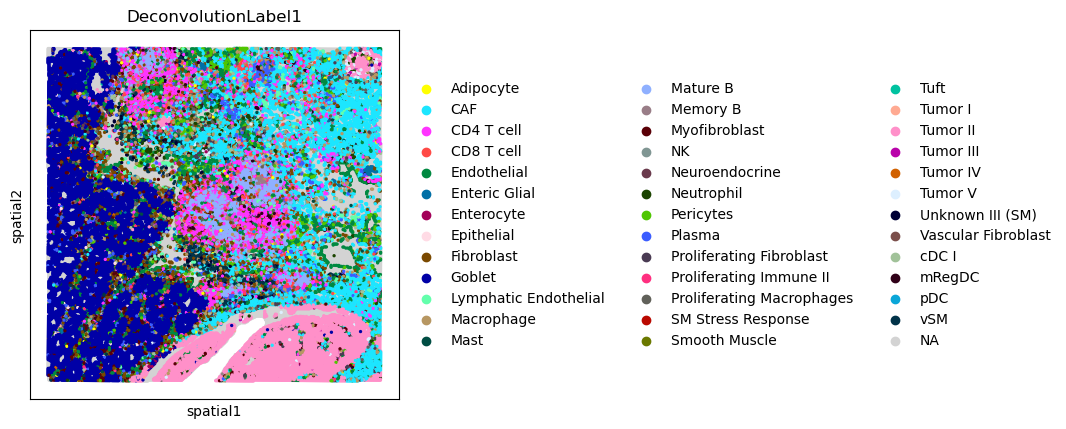

In [5]:
sc.pl.spatial(adata, color='DeconvolutionLabel1', spot_size=100)

### Quality Control

In [6]:
# Data Filtering with Scanpy

adata.layers["counts"] = adata.X.copy()
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=15)
adata

AnnData object with n_obs × n_vars = 29802 × 14002
    obs: 'in_tissue', 'array_row', 'array_col', 'location_id', 'region', 'DeconvolutionClass', 'DeconvolutionLabel1', 'DeconvolutionLabel2', 'n_genes'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells'
    uns: 'DeconvolutionLabel1_colors', 'region_colors', 'spatialdata_attrs'
    obsm: 'spatial'
    layers: 'counts'

### Normalization & PCA

/home/l202255179/micromamba/envs/test2/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)


sparsity_th: 0.034593353579203366


/home/l202255179/micromamba/envs/test2/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)


Initial sparse: 0.999, threshold: 0.9


/home/l202255179/micromamba/envs/test2/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)


Min(corr): 0.046408239752054214, sparsity: 0.999


/home/l202255179/micromamba/envs/test2/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)


Min(corr): 0.039304468780756, sparsity: 0.998


/home/l202255179/micromamba/envs/test2/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)


Min(corr): 0.036328356713056564, sparsity: 0.997


/home/l202255179/micromamba/envs/test2/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)


Min(corr): 0.035046592354774475, sparsity: 0.996


/home/l202255179/micromamba/envs/test2/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)


Min(corr): 0.033546384423971176, sparsity: 0.995


/home/l202255179/micromamba/envs/test2/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)


Min(corr): 0.032259270548820496, sparsity: 0.994


/home/l202255179/micromamba/envs/test2/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)


Min(corr): 0.03210741654038429, sparsity: 0.993


/home/l202255179/micromamba/envs/test2/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)


Min(corr): 0.031749412417411804, sparsity: 0.992


/home/l202255179/micromamba/envs/test2/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)


Min(corr): 0.03166336566209793, sparsity: 0.991
Sparsity calculation completed: 0.995
Max interactions exceeded!
lambda_c: 5.696695
Number of signal: 68


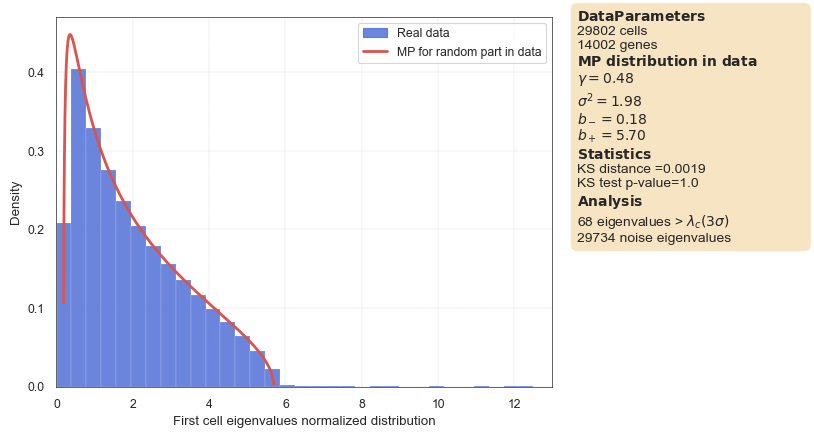

  0%|          | 0/20 [00:00<?, ?it/s]/home/l202255179/micromamba/envs/test2/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
  5%|▌         | 1/20 [00:15<04:49, 15.26s/it]/home/l202255179/micromamba/envs/test2/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
 10%|█         | 2/20 [00:30<04:37, 15.44s/it]/home/l202255179/micromamba/envs/test2/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
 15%|█▌        | 3/20 [00:45<04:19, 15.27s/it]/home/l202255179/micromamba/envs/test2/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_com

number of filtered signals: 26


AnnData object with n_obs × n_vars = 29802 × 14002
    obs: 'in_tissue', 'array_row', 'array_col', 'location_id', 'region', 'DeconvolutionClass', 'DeconvolutionLabel1', 'DeconvolutionLabel2', 'n_genes'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells'
    uns: 'DeconvolutionLabel1_colors', 'region_colors', 'spatialdata_attrs', 'stlens'
    obsm: 'spatial'
    layers: 'counts'

In [7]:
stlens.find_optimal_pc(adata, plot_mp = True, device='gpu')
adata

In [8]:
n_comps = adata.uns['stlens']['optimal_pc_count']
print("Optimal number of PCs:", n_comps)

Optimal number of PCs: 26


In [9]:
# PCA transformation using stLENS’s pca function
# Note that the PCA result is l2 normalized - thus all the downstream analyses should use cosine distance as the metric.
stlens.pca(adata)
adata

AnnData object with n_obs × n_vars = 29802 × 14002
    obs: 'in_tissue', 'array_row', 'array_col', 'location_id', 'region', 'DeconvolutionClass', 'DeconvolutionLabel1', 'DeconvolutionLabel2', 'n_genes'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells'
    uns: 'DeconvolutionLabel1_colors', 'region_colors', 'spatialdata_attrs', 'stlens'
    obsm: 'spatial', 'X_pca_stlens'
    layers: 'counts'

In [10]:
adata.obsm['X_pca_stlens']

array([[-0.00766407, -0.00677196,  0.01544071, ..., -0.00440689,
        -0.10307089,  0.01268619],
       [-0.00215036, -0.005794  ,  0.01203247, ...,  0.00906448,
        -0.05090332,  0.00488052],
       [ 0.00963686, -0.00426296, -0.00664283, ...,  0.090253  ,
         0.00809249, -0.05909142],
       ...,
       [-0.0100454 ,  0.00954647,  0.00192717, ...,  0.00374383,
        -0.05160753,  0.00448453],
       [-0.0060095 ,  0.019509  ,  0.00448853, ..., -0.04540766,
         0.06335371, -0.09322847],
       [ 0.00534162, -0.00894247,  0.01311174, ...,  0.02205605,
        -0.0471961 , -0.00931266]], shape=(29802, 26))

### Plot

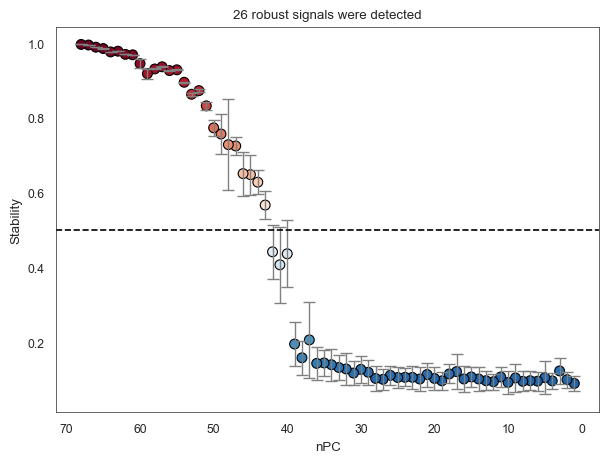

In [11]:
stlens.plot_robust_score(adata)

### Clean Temp Files

In [ ]:
#optinal
stlens.clean_tempfiles()

### Downstream Analysis

In [14]:
# Find clusters using stLENS PCA result
sc.pp.neighbors(adata, use_rep='X_pca_stlens', metric='cosine')
sc.tl.leiden(adata)

/tmp/ipykernel_2914654/3467744858.py:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata)


/tmp/ipykernel_2914654/4070911133.py:4: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(adata, color='DeconvolutionLabel1', spot_size=100, ax=axs[0], show=False)
/tmp/ipykernel_2914654/4070911133.py:7: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(adata, color='leiden', spot_size=100, ax=axs[1], show=False)


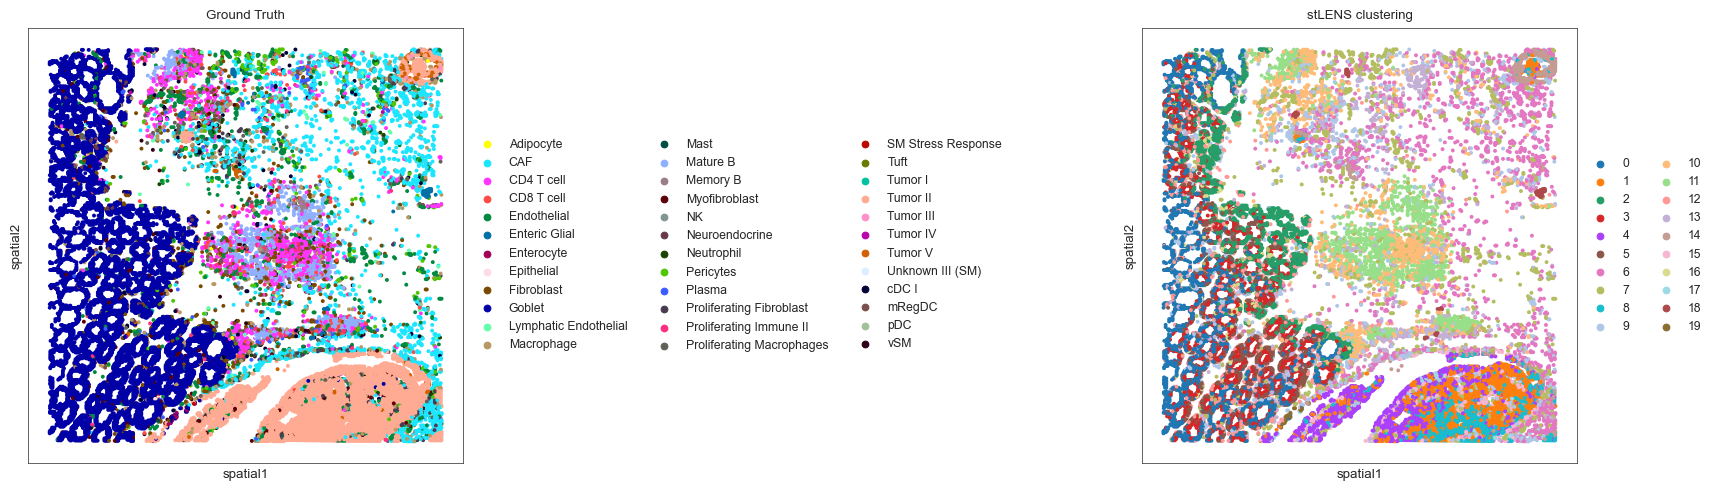

In [138]:
# Comparing the clustering results with the ground truth
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,2, figsize=(20, 5))
sc.pl.spatial(adata, color='DeconvolutionLabel1', spot_size=100, ax=axs[0], show=False)
axs[0].set_title("Ground Truth")

sc.pl.spatial(adata, color='leiden', spot_size=100, ax=axs[1], show=False)
axs[1].set_title("stLENS clustering")

plt.tight_layout()

## STOmics

In [ ]:
from stLENS import stLENS
stlens = stLENS()

### Load data

In [139]:
!wget -P ./data/stomics https://ftp.cngb.org/pub/SciRAID/stomics/STDS0000058/stomics/E16.5_E1S3_cell_bin_whole_brain.h5ad 

--2025-07-29 18:35:40--  https://ftp.cngb.org/pub/SciRAID/stomics/STDS0000058/stomics/E16.5_E1S3_cell_bin_whole_brain.h5ad
Resolving ftp.cngb.org (ftp.cngb.org)... 101.126.80.204
Connecting to ftp.cngb.org (ftp.cngb.org)|101.126.80.204|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 732847864 (699M) [application/octet-stream]
Saving to: ‘./data/stomics/E16.5_E1S3_cell_bin_whole_brain.h5ad.1’

E16.5_E1S3_cell_bin 100%[===================>] 698.90M  4.81MB/s    in 2m 31s  

2025-07-29 18:38:12 (4.62 MB/s) - ‘./data/stomics/E16.5_E1S3_cell_bin_whole_brain.h5ad.1’ saved [732847864/732847864]



In [1]:
import scanpy as sc
adata = sc.read_h5ad('./data/stomics/E16.5_E1S3_cell_bin_whole_brain.h5ad')
adata

AnnData object with n_obs × n_vars = 65303 × 23368
    obs: 'Slice', 'region', 'sim anno', 'n_genes_by_counts', 'total_counts', 'annotation'
    var: 'Gene', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'total_counts', 'log1p_total_counts'
    uns: 'sim anno_colors'
    obsm: 'spatial'
    layers: 'counts'

### Quality Control

In [3]:
# Data Filtering with Scanpy

adata.X = adata.layers["counts"].copy()
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=15)
adata

AnnData object with n_obs × n_vars = 65303 × 19182
    obs: 'Slice', 'region', 'sim anno', 'n_genes_by_counts', 'total_counts', 'annotation', 'n_genes'
    var: 'Gene', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'sim anno_colors'
    obsm: 'spatial'
    layers: 'counts'

### Normalization & PCA

/home/l202255179/micromamba/envs/test2/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)


sparsity_th: 0.03007698664917274


/home/l202255179/micromamba/envs/test2/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)


Initial sparse: 0.999, threshold: 0.9


/home/l202255179/micromamba/envs/test2/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)


Min(corr): 0.033152446150779724, sparsity: 0.999


/home/l202255179/micromamba/envs/test2/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)


Min(corr): 0.030330311506986618, sparsity: 0.998


/home/l202255179/micromamba/envs/test2/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)


Min(corr): 0.02929278276860714, sparsity: 0.997


/home/l202255179/micromamba/envs/test2/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)


Min(corr): 0.02806856483221054, sparsity: 0.996


/home/l202255179/micromamba/envs/test2/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)


Min(corr): 0.027880672365427017, sparsity: 0.995


/home/l202255179/micromamba/envs/test2/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)


Min(corr): 0.027227669954299927, sparsity: 0.994


/home/l202255179/micromamba/envs/test2/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)


Min(corr): 0.026560813188552856, sparsity: 0.993
Sparsity calculation completed: 0.997
Max interactions exceeded!
lambda_c: 7.377504879789683
Number of signal: 195


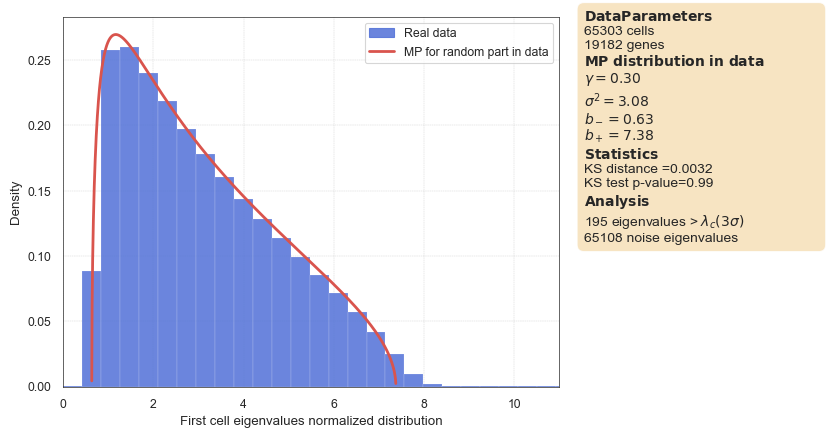

  0%|          | 0/20 [00:00<?, ?it/s]/home/l202255179/micromamba/envs/test2/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
  5%|▌         | 1/20 [00:38<12:15, 38.68s/it]/home/l202255179/micromamba/envs/test2/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
 10%|█         | 2/20 [01:16<11:32, 38.46s/it]/home/l202255179/micromamba/envs/test2/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
 15%|█▌        | 3/20 [01:55<10:50, 38.26s/it]/home/l202255179/micromamba/envs/test2/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_com

number of filtered signals: 37


AnnData object with n_obs × n_vars = 65303 × 19182
    obs: 'Slice', 'region', 'sim anno', 'n_genes_by_counts', 'total_counts', 'annotation', 'n_genes'
    var: 'Gene', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'sim anno_colors', 'stlens'
    obsm: 'spatial'
    layers: 'counts'

In [4]:
stlens.find_optimal_pc(adata, plot_mp = True, device='gpu')
adata

In [5]:
# PCA transformation using stLENS’s pca function
# Note that the PCA result is l2 normalized - thus all the downstream analyses should use cosine distance as the metric.
stlens.pca(adata)
adata

AnnData object with n_obs × n_vars = 65303 × 19182
    obs: 'Slice', 'region', 'sim anno', 'n_genes_by_counts', 'total_counts', 'annotation', 'n_genes'
    var: 'Gene', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'sim anno_colors', 'stlens'
    obsm: 'spatial', 'X_pca_stlens'
    layers: 'counts'

### Plot

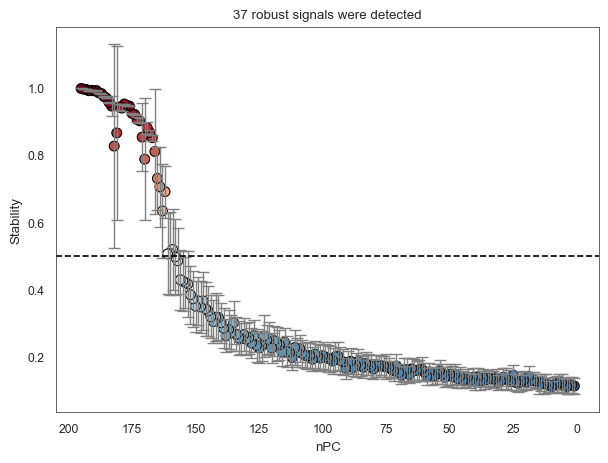

In [6]:
stlens.plot_robust_score(adata)

### Clean Temp Files

In [ ]:
#optinal
stlens.clean_tempfiles()

### Downstream Analysis

In [7]:
# Find clusters using stLENS PCA result
sc.pp.neighbors(adata, use_rep='X_pca_stlens', metric='cosine')
sc.tl.leiden(adata)

/tmp/ipykernel_2918715/664060405.py:3: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata)


/tmp/ipykernel_2918715/1186066510.py:5: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(adata, color='annotation', spot_size=100, ax=axs[0], show=False)
/tmp/ipykernel_2918715/1186066510.py:8: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(adata, color='leiden', spot_size=100, ax=axs[1], show=False)


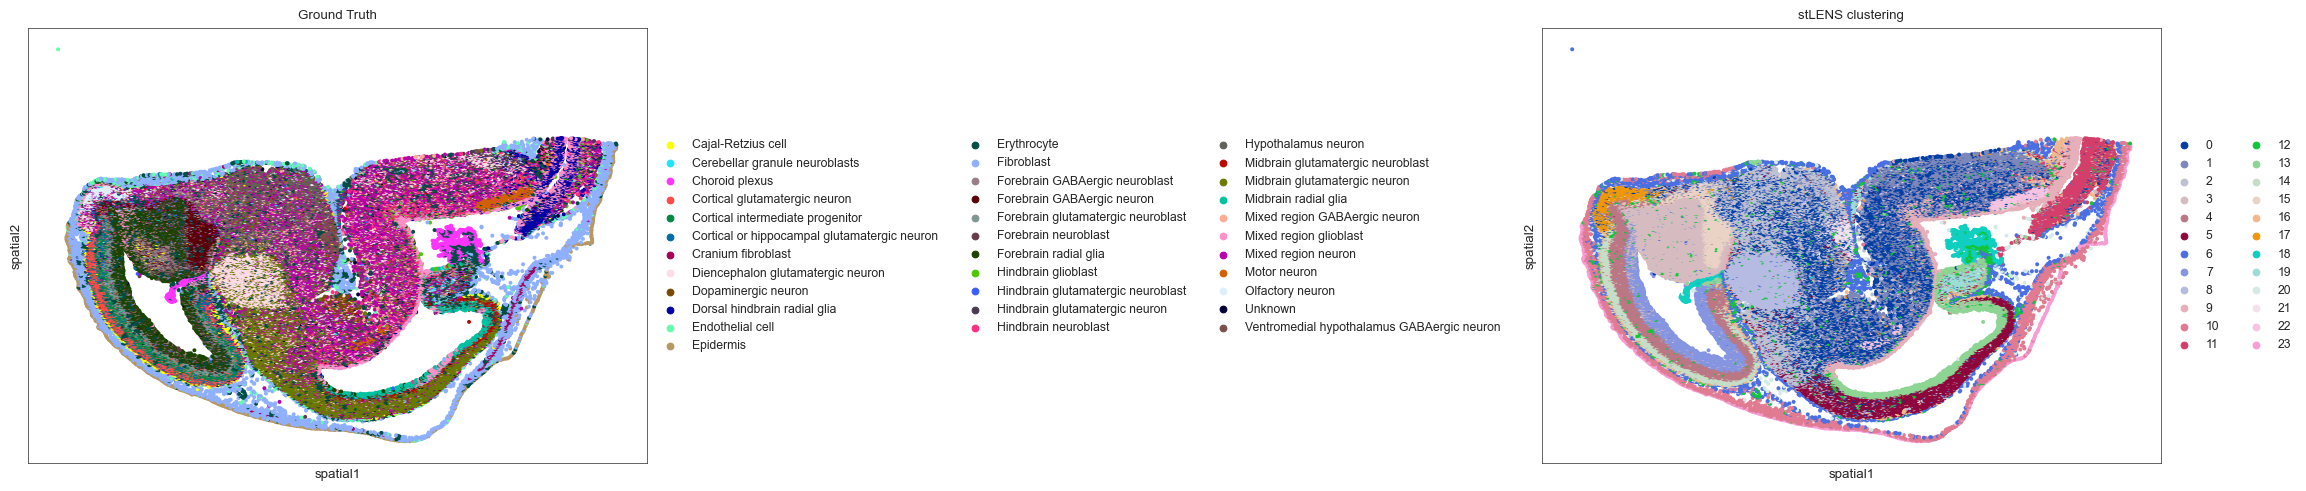

In [10]:
# Comparing the clustering results with the ground truth
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,2, figsize=(25, 5))
sc.pl.spatial(adata, color='annotation', spot_size=100, ax=axs[0], show=False)
axs[0].set_title("Ground Truth")

sc.pl.spatial(adata, color='leiden', spot_size=100, ax=axs[1], show=False)
axs[1].set_title("stLENS clustering")

plt.tight_layout()